# Predicting Earnings from Census Data

<img src="images/cash.jpg"/>

The United States government periodically collects demographic information by conducting a census.

In this problem, we are going to use census information about an individual to predict how much a person earns -- in particular, whether the person earns more than $50,000 per year. This data comes from the UCI Machine Learning Repository.

The file census.csv contains 1994 census data for 31,978 individuals in the United States.

### The Data

The dataset includes the following 13 variables:

    age = the age of the individual in years
    
    workclass = the classification of the individual's working status (does the person work for the federal government, work for the local government, work without pay, and so on)
    
    education = the level of education of the individual (e.g., 5th-6th grade, high school graduate, PhD, so on)
    
    maritalstatus = the marital status of the individual
    
    occupation = the type of work the individual does (e.g., administrative/clerical work, farming/fishing, sales and so on)
    
    relationship = relationship of individual to his/her household
    
    race = the individual's race
    
    sex = the individual's sex
    
    capitalgain = the capital gains of the individual in 1994 (from selling an asset such as a stock or bond for more than the original purchase price)
    
    capitalloss = the capital losses of the individual in 1994 (from selling an asset such as a stock or bond for less than the original purchase price)
    
    hoursperweek = the number of hours the individual works per week
    
    nativecountry = the native country of the individual
    
    over50k = whether or not the individual earned more than $50,000 in 1994

### Load and Exploration the Data

In [1]:
census = read.csv("data/census.csv")
head(census)

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,over50k
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [2]:
str(census)

'data.frame':	31978 obs. of  13 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass    : Factor w/ 9 levels " ?"," Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ education    : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ maritalstatus: Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation   : Factor w/ 15 levels " ?"," Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capitalgain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capitalloss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hoursperweek : int  40 13 40 40 40 40 16 45 50 40 ...
 $ nativecountry: Factor w/ 41 levels " Cambodia"," Canada",..: 39 39 39 39 5 39 23 39 39 39 ...
 $ over50k      : Fa

In [3]:
summary(census)

      age                    workclass             education    
 Min.   :17.00    Private         :22286    HS-grad     :10368  
 1st Qu.:28.00    Self-emp-not-inc: 2499    Some-college: 7187  
 Median :37.00    Local-gov       : 2067    Bachelors   : 5210  
 Mean   :38.58    ?               : 1809    Masters     : 1674  
 3rd Qu.:48.00    State-gov       : 1279    Assoc-voc   : 1366  
 Max.   :90.00    Self-emp-inc    : 1074    11th        : 1167  
                 (Other)          :  964   (Other)      : 5006  
                maritalstatus              occupation            relationship  
  Divorced             : 4394    Prof-specialty :4038    Husband       :12947  
  Married-AF-spouse    :   23    Craft-repair   :4030    Not-in-family : 8156  
  Married-civ-spouse   :14692    Exec-managerial:3992    Other-relative:  952  
  Married-spouse-absent:  397    Adm-clerical   :3721    Own-child     : 5005  
  Never-married        :10488    Sales          :3584    Unmarried     : 3384  


### Problem 1.1 - A Logistic Regression Model
Let's begin by building a logistic regression model to predict whether an individual's earnings are above $50,000 (the variable "over50k") using all of the other variables as independent variables. First, read the dataset census.csv into R.

Then, split the data randomly into a training set and a testing set, setting the seed to 2000 before creating the split. Split the data so that the training set contains 60% of the observations, while the testing set contains 40% of the observations.

Next, build a logistic regression model to predict the dependent variable "over50k", using all of the other variables in the dataset as independent variables. Use the training set to build the model.

Which variables are significant, or have factors that are significant? (Use 0.1 as your significance threshold, so variables with a period or dot in the stars column should be counted too. You might see a warning message here - you can ignore it and proceed. This message is a warning that we might be overfitting our model to the training set.)


In [4]:
library(caTools)

In [5]:
# Split the data

set.seed(2000)

spl = sample.split(census$over50k, SplitRatio = 0.6)

train = subset(census, spl==TRUE)
test = subset(census, spl==FALSE)

In [6]:
# Logistic Regression
censusglm = glm( over50k ~ . , family="binomial", data = train)

# Ouput summary
summary(censusglm)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = over50k ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1065  -0.5037  -0.1804  -0.0008   3.3383  

Coefficients: (1 not defined because of singularities)
                                           Estimate Std. Error z value Pr(>|z|)
(Intercept)                              -8.658e+00  1.379e+00  -6.279 3.41e-10
age                                       2.548e-02  2.139e-03  11.916  < 2e-16
workclass Federal-gov                     1.105e+00  2.014e-01   5.489 4.03e-08
workclass Local-gov                       3.675e-01  1.821e-01   2.018 0.043641
workclass Never-worked                   -1.283e+01  8.453e+02  -0.015 0.987885
workclass Private                         6.012e-01  1.626e-01   3.698 0.000218
workclass Self-emp-inc                    7.575e-01  1.950e-01   3.884 0.000103
workclass Self-emp-not-inc                1.855e-01  1.774e-01   1.046 0.295646
workclass State-gov                      

All variables besides race and nativecountry are significant.

### Problem 1.2 - A Logistic Regression Model
What is the accuracy of the model on the testing set? Use a threshold of 0.5. (You might see a warning message when you make predictions on the test set - you can safely ignore it.)

In [7]:
# Make predictions
predictTest = predict(censusglm, newdata = test, type = "response")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


In [8]:
# Confusion matrix
cmLR = table(test$over50k, predictTest >= 0.5)
cmLR

        
         FALSE TRUE
   <=50K  9051  662
   >50K   1190 1888

The rows are labeled with the actual outcome, and the columns are labeled with the predicted outcome.

                      Predict 0       Predict 1
        Actual 0    True Negative   False Positive
        Actual 1    False Negative  True Positive

        cmLR = [1][3]
               [2][4]

In [9]:
# Compute Logistic Regression Accuracy
accurLR = sum(diag(cmLR))/sum(cmLR)
paste("Accuracy Logistic Regression:", round(accurLR,digits=4))

[1] "Accuracy Logistic Regression: 0.8552"

### Problem 1.3 - A Logistic Regression Model
What is the baseline accuracy for the testing set?

In [10]:
Bl = table(test$over50k)
Bl


 <=50K   >50K 
  9713   3078 

In [11]:
# Compute Baseline Accuracy
accurBl = Bl[1]/sum(Bl)
paste("Accuracy Baseline:", round(accurBl,digits=4))

[1] "Accuracy Baseline: 0.7594"

### Problem 1.4 - A Logistic Regression Model
What is the area-under-the-curve (AUC) for this model on the test set?

In [12]:
library(ROCR)

In [13]:
# Logistic Regression Prediction
ROCRpred = prediction(predictTest, test$over50k)

# Area Under the ROC Curve (AUC)
AUC = as.numeric(performance(ROCRpred, "auc")@y.values)

paste("AUC Logistic Regression:", round(AUC,digits=4))

[1] "AUC Logistic Regression: 0.9062"

### Problem 2.1 - A CART Model
We have just seen how the logistic regression model for this data achieves a high accuracy. Moreover, the significances of the variables give us a way to gauge which variables are relevant for this prediction task. However, it is not immediately clear which variables are more important than the others, especially due to the large number of factor variables in this problem.

Let us now build a classification tree to predict "over50k". Use the training set to build the model, and all of the other variables as independent variables. Use the default parameters, so don't set a value for minbucket or cp. Remember to specify method="class" as an argument to rpart, since this is a classification problem. After you are done building the model, plot the resulting tree.

How many splits does the tree have in total?

In [14]:
library(rpart)
library(rpart.plot)

In [15]:
#Classification and Regression Trees (CART).
censustree = rpart( over50k ~ . , method="class", data = train)

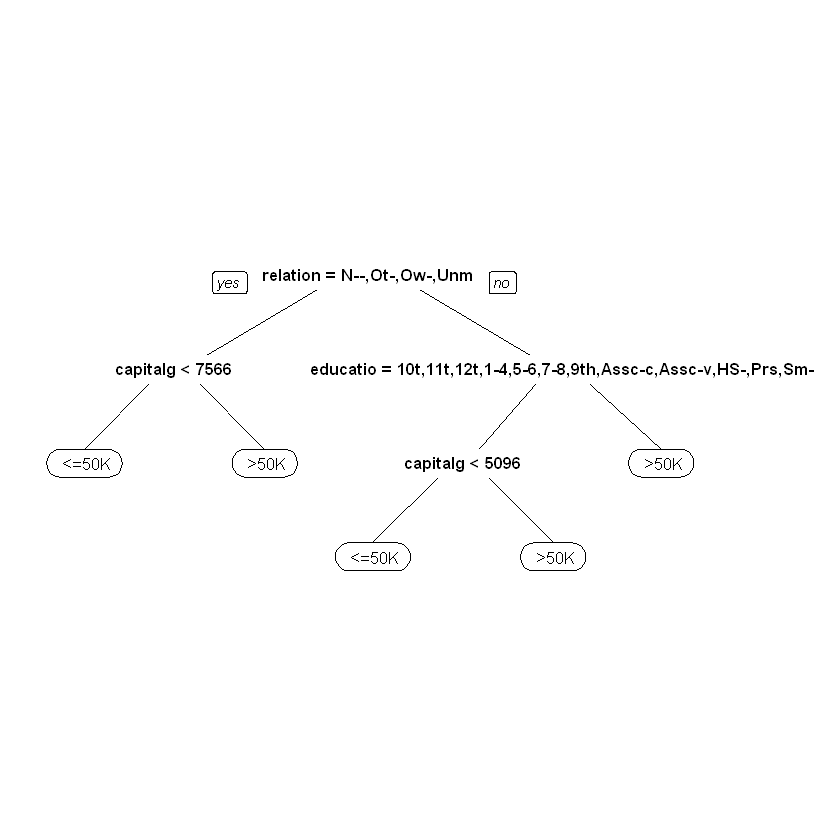

In [16]:
# Plot Tree
prp(censustree)

Answer: 4 splits.

### Problem 2.2 - A CART Model
Which variable does the tree split on at the first level (the very first split of the tree)?

Answer: **relationship**.

### Problem 2.3 - A CART Model
Which variables does the tree split on at the second level (immediately after the first split of the tree)?

Answer: **capital gain** and **education**.

### Problem 2.4 - A CART Model
What is the accuracy of the model on the testing set? Use a threshold of 0.5. (You can either add the argument type="class", or generate probabilities and use a threshold of 0.5 like in logistic regression.)

This highlights a very regular phenomenon when comparing CART and logistic regression. CART often performs a little worse than logistic regression in out-of-sample accuracy. However, as is the case here, the CART model is often much simpler to describe and understand.

In [17]:
# Make predictions
predictTest = predict(censustree, newdata = test, type = "class")

In [18]:
# Confusion matrix
cmCM = table(test$over50k, predictTest)
cmCM

        predictTest
          <=50K  >50K
   <=50K   9243   470
   >50K    1482  1596

In [19]:
# Compute Classification and Regression Trees Accuracy
accurCM = sum(diag(cmCM))/sum(cmCM)
paste("Accuracy CART:", round(accurCM,digits=4))

[1] "Accuracy CART: 0.8474"

### Problem 2.5 - A CART Model
Let us now consider the ROC curve and AUC for the CART model on the test set. You will need to get predicted probabilities for the observations in the test set to build the ROC curve and compute the AUC. Remember that you can do this by removing the type="class" argument when making predictions, and taking the second column of the resulting object.

Plot the ROC curve for the CART model you have estimated. Observe that compared to the logistic regression ROC curve, the CART ROC curve is less smooth than the logistic regression ROC curve. Which of the following explanations for this behavior is most correct? (HINT: Think about what the ROC curve is plotting and what changing the threshold does.)

In [20]:
#library(ROCR)

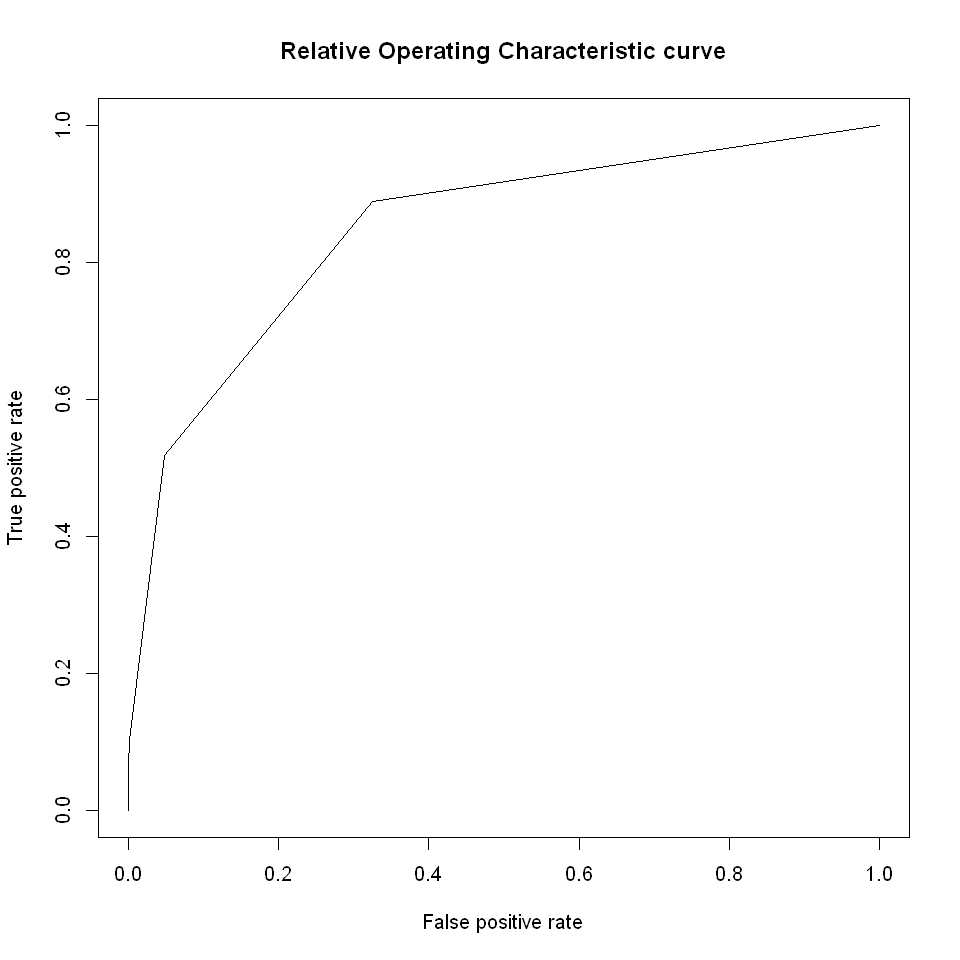

In [21]:
# Plot ROC
PredictROC2 = predict(censustree, newdata = test)

pred = prediction(PredictROC2[,2], test$over50k)

perf = performance(pred, "tpr", "fpr")

options(repr.plot.width=8, repr.plot.height=8)

plot(perf, main="Relative Operating Characteristic curve")

Answer: The breakpoints of the curve correspond to the false and true positive rates when the threshold is set to the five possible probability values.

### Problem 2.6 - A CART Model
What is the AUC of the CART model on the test set?

In [22]:
# Classification and Regression Trees Prediction
predictTest2 = predict(censustree, newdata = test)

ROCRpred2 = prediction(predictTest2[,2], test$over50k)

# Area Under the ROC Curve (AUC)
AUC2 = as.numeric(performance(ROCRpred2, "auc")@y.values)

paste("AUC CART:", round(AUC2,digits=4))

[1] "AUC CART: 0.847"

### Problem 3.1 - A Random Forest Model
Before building a random forest model, we'll down-sample our training set. While some modern personal computers can build a random forest model on the entire training set, others might run out of memory when trying to train the model since random forests is much more computationally intensive than CART or Logistic Regression. For this reason, before continuing we will define a new training set to be used when building our random forest model, that contains 2000 randomly selected obervations from the original training set. Do this by running the following commands in your R console (assuming your training set is called "train"):

    set.seed(1)

    trainSmall = train[sample(nrow(train), 2000), ]

Let us now build a random forest model to predict "over50k", using the dataset "trainSmall" as the data used to build the model. Set the seed to 1 again right before building the model, and use all of the other variables in the dataset as independent variables. (If you get an error that random forest "can not handle categorical predictors with more than 32 categories", re-build the model without the nativecountry variable as one of the independent variables.)

Then, make predictions using this model on the entire test set. What is the accuracy of the model on the test set, using a threshold of 0.5? (Remember that you don't need a "type" argument when making predictions with a random forest model if you want to use a threshold of 0.5. Also, note that your accuracy might be different from the one reported here, since random forest models can still differ depending on your operating system, even when the random seed is set. )

In [23]:
# New Training Set
set.seed(1)

trainSmall = train[sample(nrow(train), 2000), ]

In [24]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [25]:
set.seed(1)

censusrf = randomForest(over50k ~ . , data = trainSmall)

In [26]:
# Make predictions
predictTest3 = predict(censusrf, newdata=test)

In [27]:
# Confusion matrix
cmRF = table(test$over50k, predictTest3)
cmRF

        predictTest3
          <=50K  >50K
   <=50K   8955   758
   >50K    1125  1953

In [28]:
# Compute Random Forrest Accuracy
accurRF = sum(diag(cmRF))/sum(cmRF)
paste("Accuracy Randon Forrest:", round(accurRF,digits=4))

[1] "Accuracy Randon Forrest: 0.8528"

### Problem 3.2 - A Random Forest Model
As we discussed in lecture, random forest models work by building a large collection of trees. As a result, we lose some of the interpretability that comes with CART in terms of seeing how predictions are made and which variables are important. However, we can still compute metrics that give us insight into which variables are important.

One metric that we can look at is the number of times, aggregated over all of the trees in the random forest model, that a certain variable is selected for a split. To view this metric, run the following lines of R code (replace "MODEL" with the name of your random forest model):

    vu = varUsed(MODEL, count=TRUE)

    vusorted = sort(vu, decreasing = FALSE, index.return = TRUE)

    dotchart(vusorted$x, names(MODEL$forest$xlevels[vusorted$ix]))

This code produces a chart that for each variable measures the number of times that variable was selected for splitting (the value on the x-axis). Which of the following variables is the most important in terms of the number of splits?

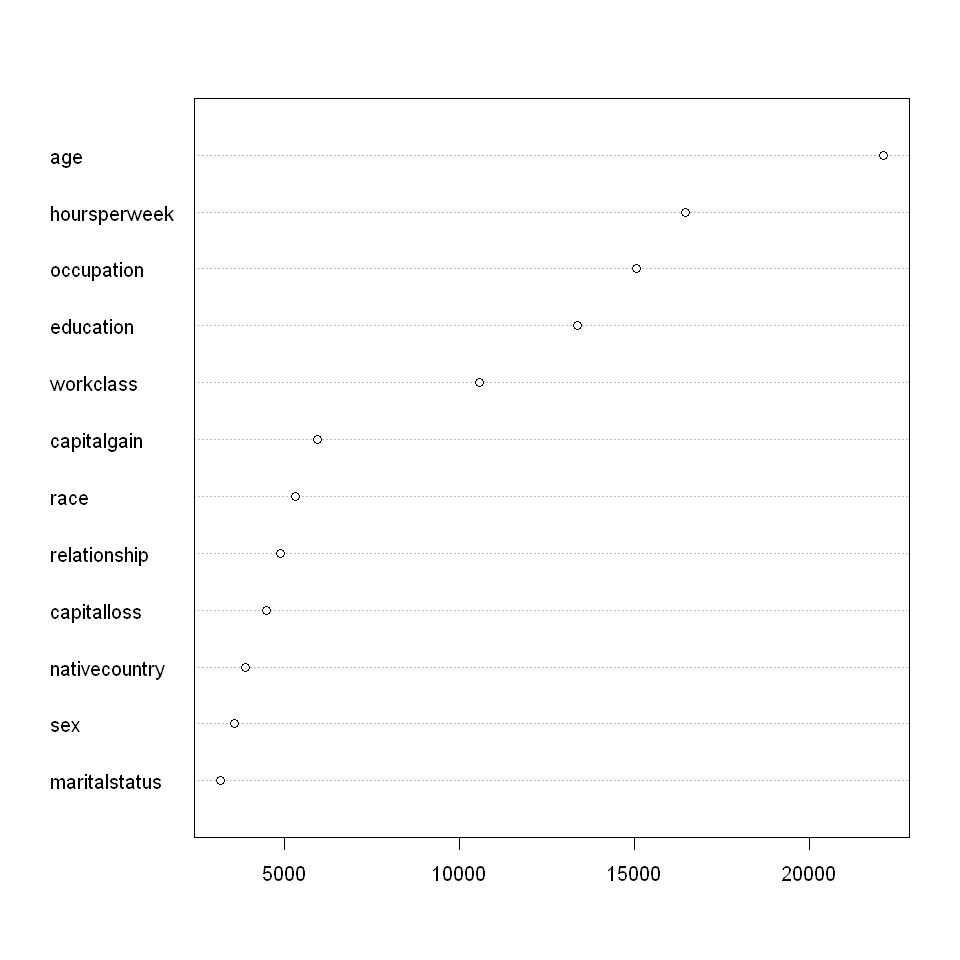

In [29]:
# Metric
vu = varUsed(censusrf, count=TRUE)

vusorted = sort(vu, decreasing = FALSE, index.return = TRUE)

dotchart(vusorted$x, names(censusrf$forest$xlevels[vusorted$ix]))

Answer: Age is the most important in terms of the number of splits.

### Problem 3.3 - A Random Forest Model
A different metric we can look at is related to "impurity", which measures how homogenous each bucket or leaf of the tree is. In each tree in the forest, whenever we select a variable and perform a split, the impurity is decreased. Therefore, one way to measure the importance of a variable is to average the reduction in impurity, taken over all the times that variable is selected for splitting in all of the trees in the forest. To compute this metric, run the following command in R (replace "MODEL" with the name of your random forest model):

    varImpPlot(MODEL)

Which one of the following variables is the most important in terms of mean reduction in impurity?

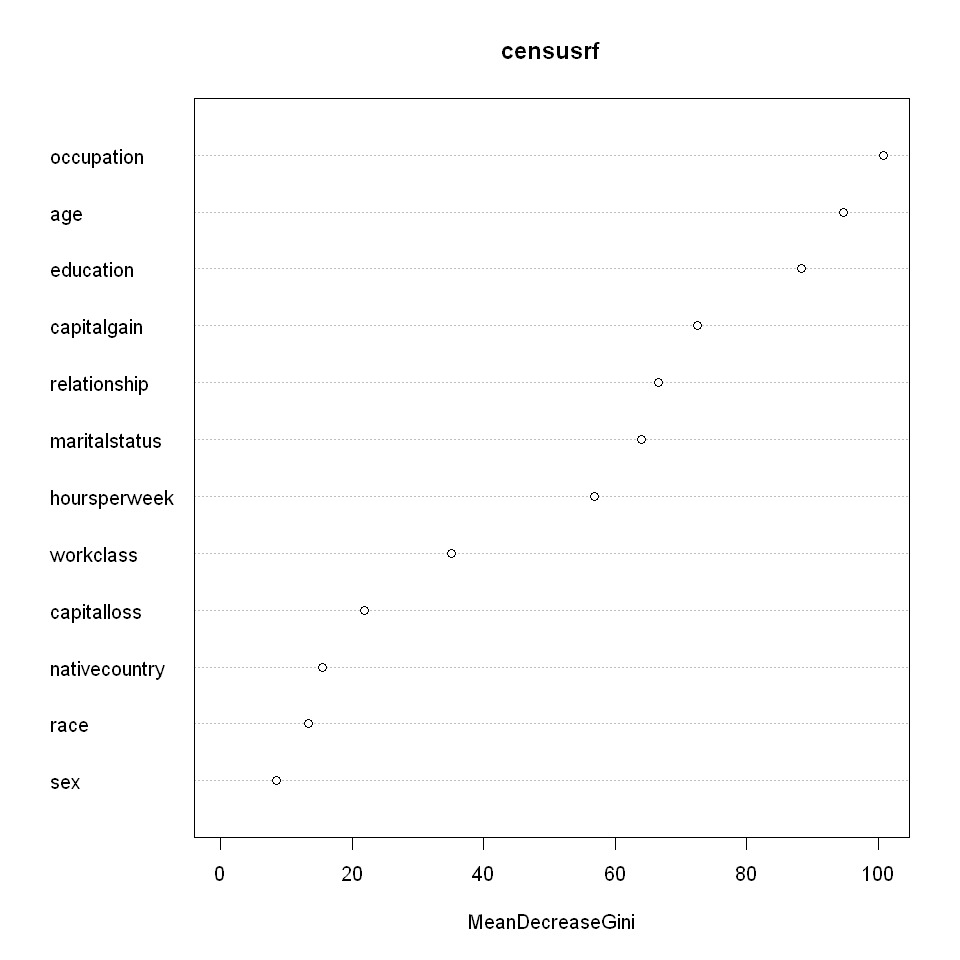

In [30]:
# Metric
varImpPlot(censusrf)

Answer: Occupation is the most important in terms of mean reduction in impurity.

### Problem 4.1 - Selecting cp by Cross-Validation
We now conclude our study of this data set by looking at how CART behaves with different choices of its parameters.

Let us select the cp parameter for our CART model using k-fold cross validation, with k = 10 folds. Do this by using the train function. Set the seed beforehand to 2. Test cp values from 0.002 to 0.1 in 0.002 increments, by using the following command:

    cartGrid = expand.grid( .cp = seq(0.002,0.1,0.002))

Also, remember to use the entire training set "train" when building this model. The train function might take some time to run.

Which value of cp does the train function recommend?

In [31]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2


Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin




In [32]:
# Cross-Validation
set.seed(2)

fitControl = trainControl( method = "cv", number = 10 )

# Select cp
cartGrid = expand.grid( .cp = seq(0.002,0.1,0.002)) 

train( over50k ~ . , data = train, method = "rpart", trControl = fitControl, tuneGrid = cartGrid )

CART 

19187 samples
   12 predictor
    2 classes: ' <=50K', ' >50K' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 17268, 17269, 17269, 17268, 17268, 17268, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa     
  0.002  0.8506804  0.55166958
  0.004  0.8473968  0.55338034
  0.006  0.8458331  0.54517523
  0.008  0.8446864  0.54487864
  0.010  0.8448428  0.54615398
  0.012  0.8448428  0.54615398
  0.014  0.8448428  0.54615398
  0.016  0.8439048  0.54146539
  0.018  0.8415598  0.52766202
  0.020  0.8401527  0.51892369
  0.022  0.8390060  0.50919387
  0.024  0.8387453  0.50576836
  0.026  0.8387453  0.50576836
  0.028  0.8387453  0.50576836
  0.030  0.8376510  0.49966842
  0.032  0.8369215  0.49452710
  0.034  0.8349931  0.47865253
  0.036  0.8304592  0.45552417
  0.038  0.8255600  0.43503975
  0.040  0.8243611  0.43009541
  0.042  0.8243611  0.43009541
  0.044  0.8243611  0.43009541
  0.046  0.8243611  0.43009541
  0.048  

Answer: cp = 0.002.

### Problem 4.2 - Selecting cp by Cross-Validation
Fit a CART model to the training data using this value of cp. What is the prediction accuracy on the test set?

In [33]:
# CART model
CARTcv = rpart(over50k~., data=train, method="class", cp=0.002)

# Make predictions
predictTest = predict(CARTcv, newdata=test, type="class")

In [34]:
# Confusion matrix
cmCV = table(test$over50k, predictTest)
cmCV

        predictTest
          <=50K  >50K
   <=50K   9178   535
   >50K    1240  1838

In [35]:
# Compute CART with Cross-Validation Accuracy
accurCV = sum(diag(cmCV))/sum(cmCV)
paste("Accuracy CART with Cross-Validation:", round(accurCV,digits=4))

[1] "Accuracy CART with Cross-Validation: 0.8612"

### Problem 4.3 - Selecting cp by Cross-Validation
Compared to the original accuracy using the default value of cp, this new CART model is an improvement, and so we should clearly favor this new model over the old one -- or should we? Plot the CART tree for this model. How many splits are there?

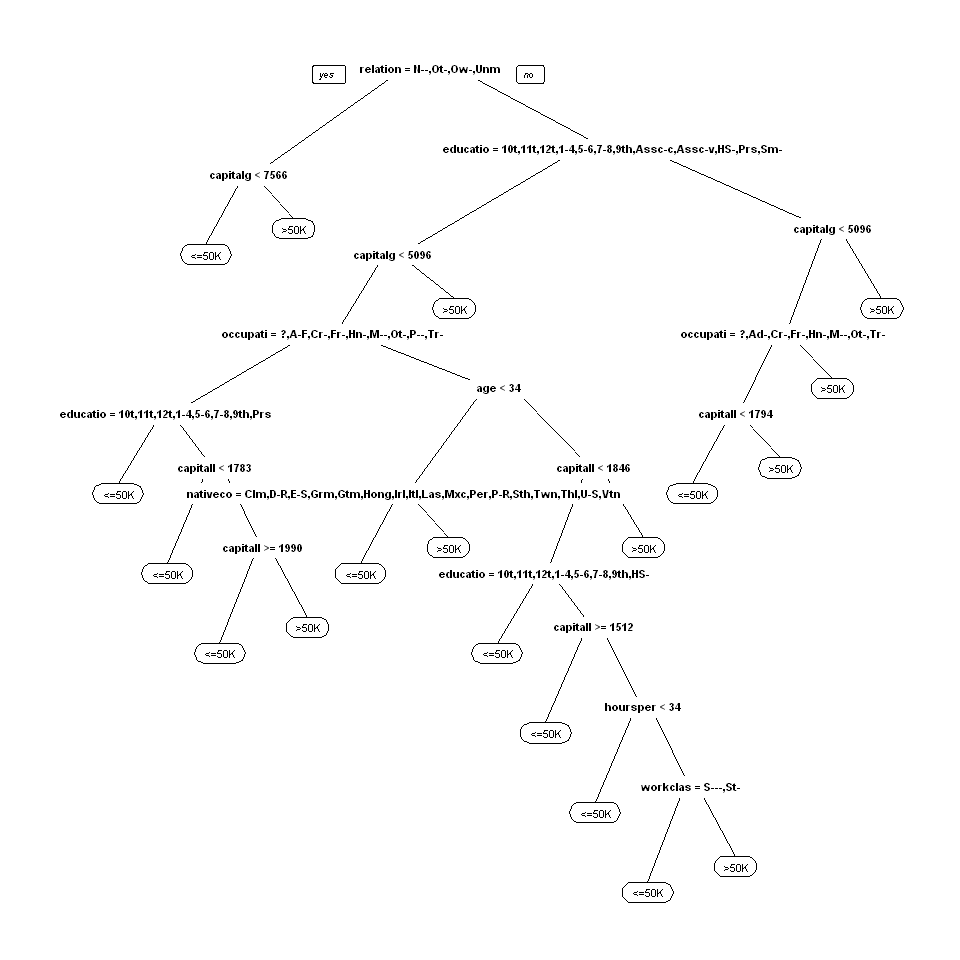

In [36]:
# Plot tree
prp(CARTcv)

In [37]:
paste("Accuracy Baseline:", round(accurBl,digits=4))
paste("Accuracy Logistic Regression:", round(accurLR,digits=4))
paste("Accuracy CART:", round(accurCM,digits=4))
paste("Accuracy Randon Forrest:", round(accurRF,digits=4))
paste("Accuracy CART with Cross-Validation:", round(accurCV,digits=4))

[1] "Accuracy Baseline: 0.7594"

[1] "Accuracy Logistic Regression: 0.8552"

[1] "Accuracy CART: 0.8474"

[1] "Accuracy Randon Forrest: 0.8528"

[1] "Accuracy CART with Cross-Validation: 0.8612"

This highlights one important tradeoff in building predictive models. By tuning cp, we improved our accuracy by over 1%, but our tree became significantly more complicated. In some applications, such an improvement in accuracy would be worth the loss in interpretability. In others, we may prefer a less accurate model that is simpler to understand and describe over a more accurate -- but more complicated -- model.